In [179]:
#import Libraries
using Zygote
using LinearAlgebra
using Plots

In [180]:
#basic model of Linear
mutable struct Linear
    W
    b
end

(l::Linear)(x) = l.W * x .+ l.b

(l::Linear)(x,y) = norm(l.W * x .+ l.b .- y, 2)

In [181]:
#generate fake data points
weights_gt = [1.2, 4.8]'
bias_gt = 2.4
X = randn(length(weights_gt), 10000)
Y = weights_gt * X .+ bias_gt
X .+= 0.05.*randn(size(X))

2×10000 Array{Float64,2}:
  2.01451   0.0307326  -1.1976    …   0.0120291  -0.0253966  0.67934 
 -0.105046  0.781164   -0.915648     -1.45506     0.92712    0.527283

In [195]:
model = Linear(rand(1,2), rand(1))

Linear([0.873726 0.0479681], [0.327685])

In [196]:
function sgd_update!(model::Linear, dmodel, η = 0.01)
    model.W .-= η .* dmodel.W
    model.b -= η * dmodel.b
end

sgd_update! (generic function with 2 methods)

In [197]:
losses_10 = []
W_log = []
b_log = []
for idx in 1:10000
    i = rand(1:size(X,2))
    losses = append!(losses_10,[model(X,Y)])
    grads = gradient(model -> model(X[:,1:10],Y[:,1:10]),model)[1][]
    W_log = append!(W_log,model.W[1])
    sgd_update!(model, grads)
end

In [198]:
model = Linear(rand(1,2), rand(1))

Linear([0.0212358 0.233226], [0.0163784])

In [199]:
losses_100 = []
W_log = []
b_log = []
for idx in 1:10000
    i = rand(1:size(X,2))
    losses = append!(losses_100,[model(X,Y)])
    grads = gradient(model -> model(X[:,1:100],Y[:,1:100]),model)[1][]
    W_log = append!(W_log,model.W[1])
    sgd_update!(model, grads)
end

In [200]:
model = Linear(rand(1,2), rand(1))

Linear([0.278012 0.0518018], [0.732065])

In [201]:
losses_1000 = []
W_log = []
b_log = []
for idx in 1:10000
    i = rand(1:size(X,2))
    losses = append!(losses_1000,[model(X,Y)])
    grads = gradient(model -> model(X[:,1:1000],Y[:,1:1000]),model)[1][]
    W_log = append!(W_log,model.W[1])
    sgd_update!(model, grads)
end

In [202]:
model = Linear(rand(1,2), rand(1))

Linear([0.902848 0.689724], [0.473123])

In [203]:
losses_stochastic = []
W_log = []
b_log = []
for idx in 1:10000
    i = rand(1:size(X,2))
    losses = append!(losses_stochastic,[model(X,Y)])
    grads = gradient(model -> model(X[:,1:10],Y[:,1:10]),model)[1][]
    W_log = append!(W_log,model.W[1])
    sgd_update!(model, grads)
end

In [216]:
X[:,1:1000]

2×1000 Array{Float64,2}:
 -0.177239  -0.740346  0.498192  -0.484419  …   0.229119    0.11998  -1.17424
  0.802331  -0.532429  1.62975    0.339829     -0.0223227  -1.06791  -1.87077

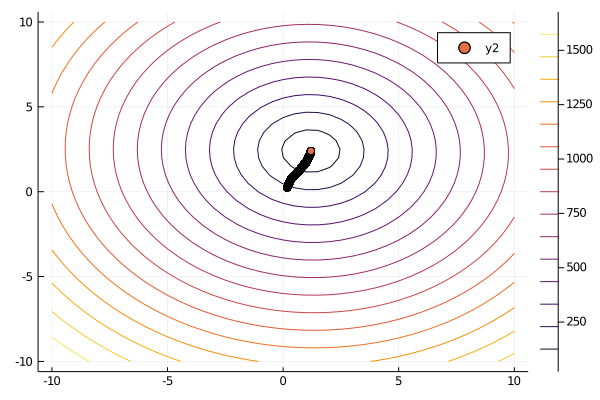

In [59]:
x =-10:0.5:10
y =-10:0.5:10
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)


In [192]:
W1 = repeat(reshape(W1_log,1,:),length(losses),1)
B = repeat(reshape(b_log,1,:),length(losses),1)
LOSS = repeat(reshape(losses,1,:),length(W1_log),1)

1000×1000 Array{Any,2}:
 9.4343  6.59806  0.558788  3.99116  2.59043  …  0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043  …  0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043  …  0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.958568  0.718219  2.46196
 9.4343  6.59806  0.558788  3.99116  2.59043     0.9

In [61]:
f(w1,w2,w3,w4,b,y1) = begin
        norm(X[:,1][1]*w1+X[:,1][2]*w2+X[:,1][3]*w3+X[:,1][4]*w4+b-y1, 2)
    end
Z = map(f,X1,X2,X3,X4,B,Y)

401×401 Array{Float64,2}:
 3.96543  3.9356  3.90578  3.87595  …  7.87595  7.90578  7.9356  7.96543
 3.97543  3.9456  3.91578  3.88595     7.86595  7.89578  7.9256  7.95543
 3.98543  3.9556  3.92578  3.89595     7.85595  7.88578  7.9156  7.94543
 3.99543  3.9656  3.93578  3.90595     7.84595  7.87578  7.9056  7.93543
 4.00543  3.9756  3.94578  3.91595     7.83595  7.86578  7.8956  7.92543
 4.01543  3.9856  3.95578  3.92595  …  7.82595  7.85578  7.8856  7.91543
 4.02543  3.9956  3.96578  3.93595     7.81595  7.84578  7.8756  7.90543
 4.03543  4.0056  3.97578  3.94595     7.80595  7.83578  7.8656  7.89543
 4.04543  4.0156  3.98578  3.95595     7.79595  7.82578  7.8556  7.88543
 4.05543  4.0256  3.99578  3.96595     7.78595  7.81578  7.8456  7.87543
 4.06543  4.0356  4.00578  3.97595  …  7.77595  7.80578  7.8356  7.86543
 4.07543  4.0456  4.01578  3.98595     7.76595  7.79578  7.8256  7.85543
 4.08543  4.0556  4.02578  3.99595     7.75595  7.78578  7.8156  7.84543
 ⋮                       

In [35]:
@info("Ground truth weights: $(weights_gt)")
@info("Learned weights: $(round.(model.W; digits=3))")
@info("Ground truth bias: $(bias_gt)")
@info("Learned bias: $(round.(model.b; digits=3))")

┌ Info: Ground truth weights: [1.2 4.8]
└ @ Main In[35]:1
┌ Info: Learned weights: [1.2 4.799]
└ @ Main In[35]:2
┌ Info: Ground truth bias: 2.4
└ @ Main In[35]:3
┌ Info: Learned bias: [2.4]
└ @ Main In[35]:4


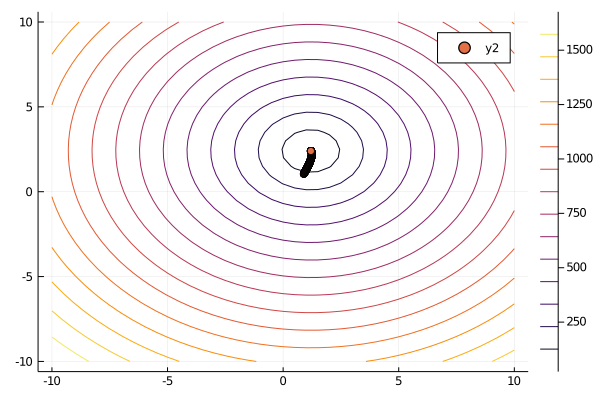

In [45]:
x =-10:0.5:10
y =-10:0.5:10
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)

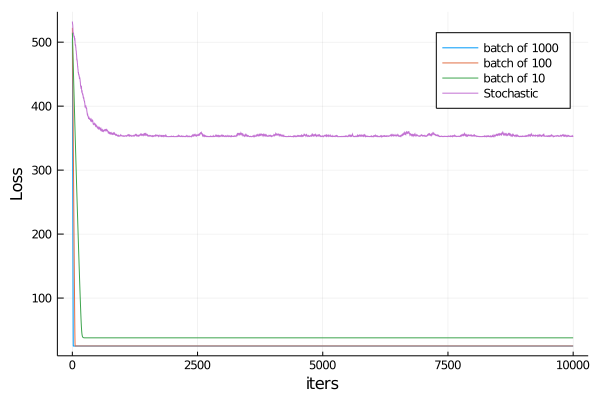

In [204]:
plot([losses_1000,losses_100,losses_10,losses_Stochastic],xlabel = "iters",ylabel="Loss",label = ["batch of 1000" "batch of 100" "batch of 10" "Stochastic"])

In [178]:
losses_10

30001-element Array{Any,1}:
 435.4686829622436  
 433.8999424560158  
 432.3351939285559  
 430.7744379561369  
 429.21767538479816 
 427.6649073301713  
 426.11613517707474 
 424.57136057887334 
 423.03058545660156 
 421.49381199784835 
 419.96104265540237 
 418.43228014565415 
 416.90752744675615 
   ⋮                
  24.929883364252998
  24.929883364252998
  24.929883364252998
  24.929883364252998
  24.929883364252998
  24.929883364252998
  24.929883364252998
  24.929883364252998
  24.929883364252998
  24.929883364252998
  24.929883364252998
  24.929883364252998